In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
data = pd.read_csv('./reviews_data.csv')

data.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [3]:
# 리뷰 분석에 사용하지 않는 Image_Links 제거

data.drop('Image_Links', axis=1, inplace=True)
data.head()

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...


In [4]:
# 데이터 중 review가 없는 행을 제거
data = data[data['Review'] != 'No Review Text']

# 순서가 일관되게 재지정
data = data.reset_index(drop=True)
data.head()

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      813 non-null    object 
 1   location  813 non-null    object 
 2   Date      813 non-null    object 
 3   Rating    703 non-null    float64
 4   Review    813 non-null    object 
dtypes: float64(1), object(4)
memory usage: 31.9+ KB


In [6]:
import os
from dateutil import parser

# 날짜 데이터의 Review, . , 의 단어를 ''로 대체
data['Date'] = data['Date'].str.replace('Reviewed', '').str.replace('[.,]', '')

# 날짜 형식으로 변환
data['Date'] = data['Date'].apply(parser.parse)

In [7]:
data.head()

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX",2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL",2023-07-16,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA",2023-07-05,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA",2023-05-26,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR",2023-01-22,5.0,I’m on this kick of drinking 5 cups of warm wa...


In [8]:
!pip install missingno


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

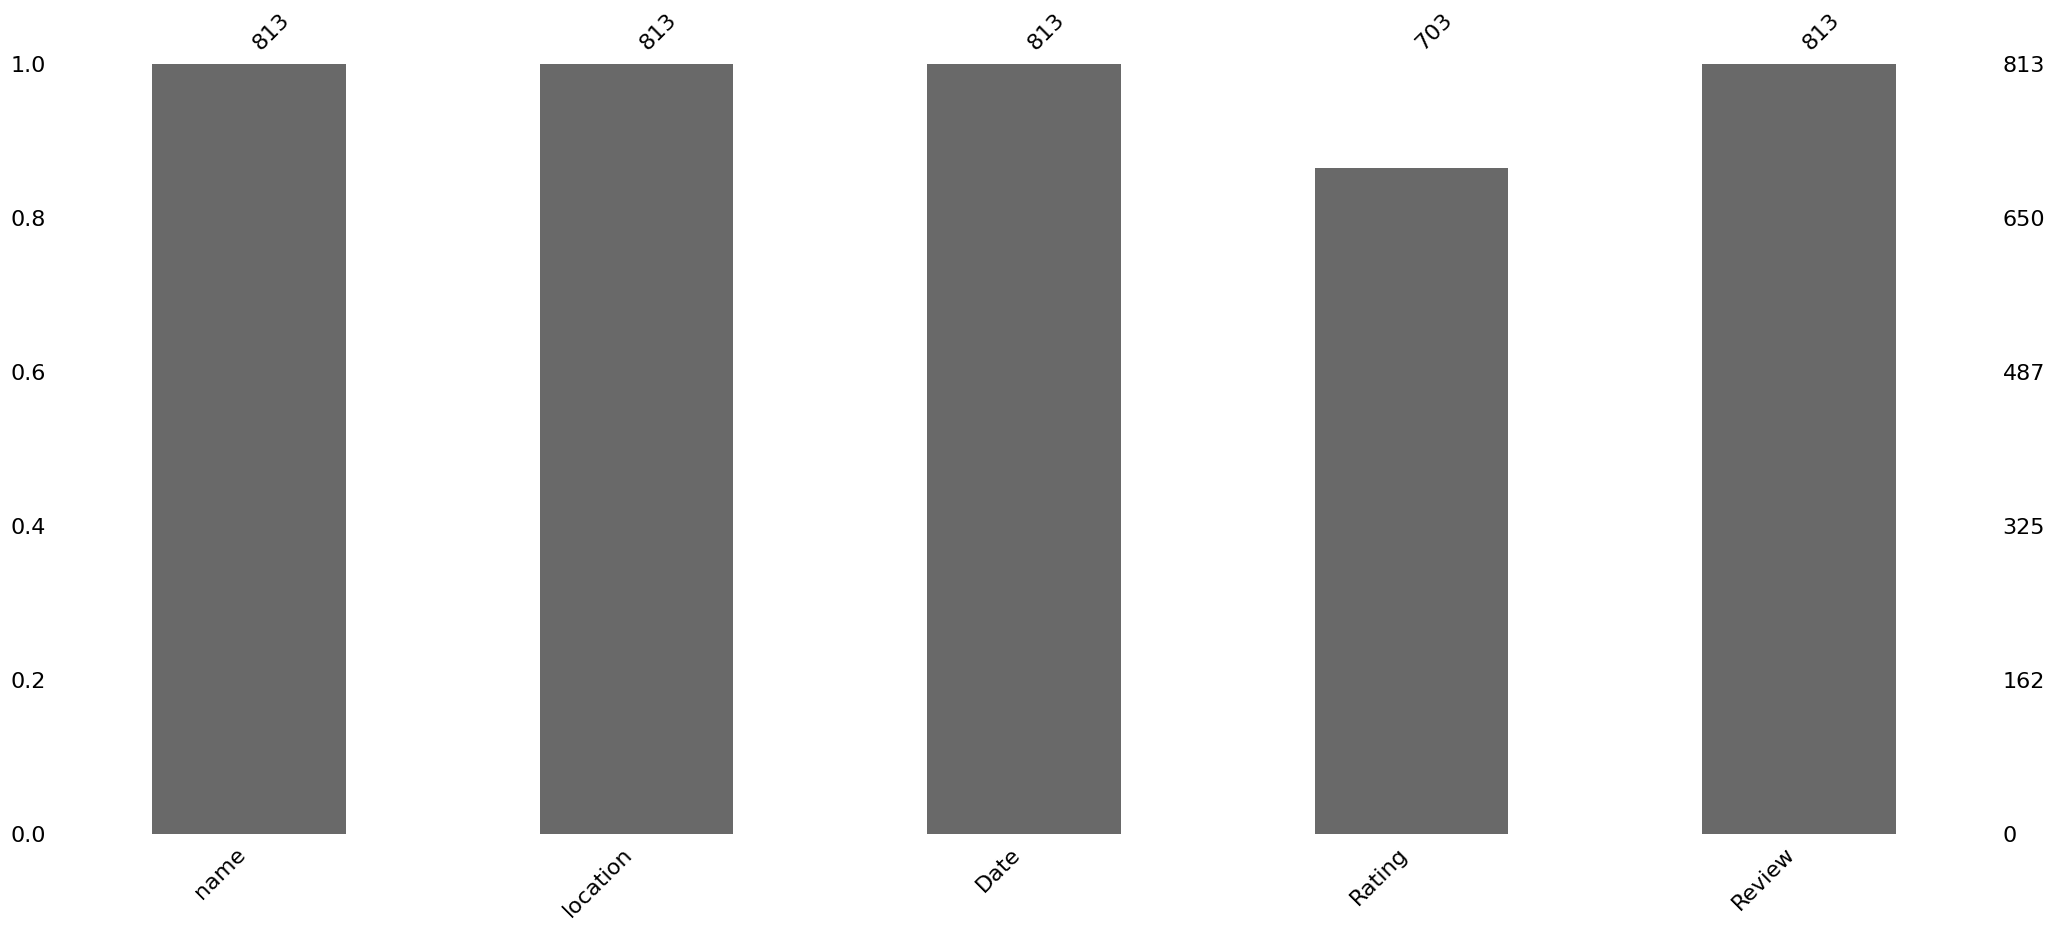

In [10]:
import missingno as msno

# 결측치 확인
# 110개의 결측치를 확인할 수 있다.
msno.bar(data)

C:\Users\user\AppData\Local\Temp\ipykernel_6932\4291106859.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating",data=data, palette="Set3")


<Axes: xlabel='Rating', ylabel='count'>

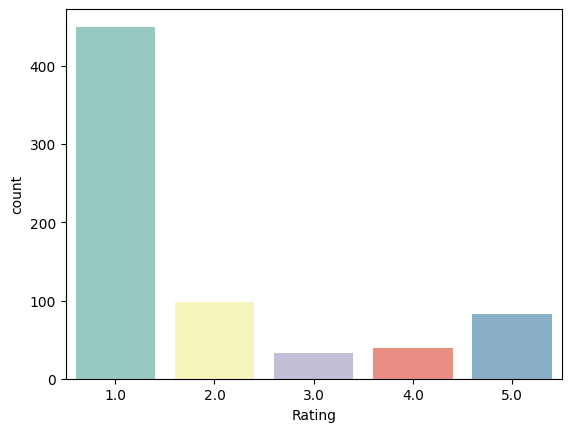

In [11]:
# 리뷰의 개수 파악하기
sns.countplot(x="Rating",data=data, palette="Set3")

In [12]:
# 3 초과의 리뷰는 긍정(2), 3미만의 숫자는 부정(1), 3은 중립(0)으로 라벨링을 진행
data["Rating"]=data["Rating"].replace([1,2],2)
data["Rating"]=data["Rating"].replace(3,0)
data["Rating"]=data["Rating"].replace([4,5],1)
data = data.dropna(axis = 0, how ='any')
data["Rating"]=data["Rating"].astype(int)

In [13]:
# 라벨링 개수 파악
data["Rating"].value_counts()

Rating
2    548
1    122
0     33
Name: count, dtype: int64

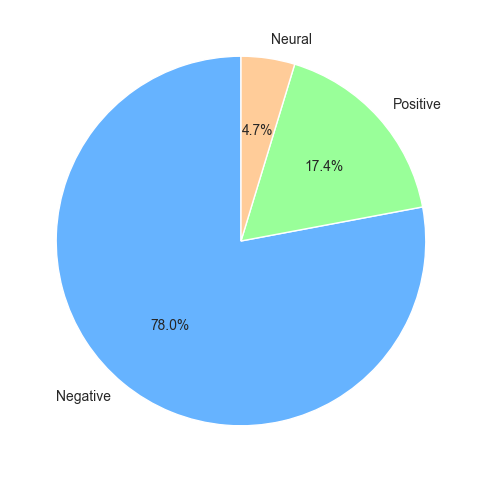

In [14]:
# 파이차트로 분포 확인
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.pie(data["Rating"].value_counts(),labels=["Negative","Positive","Neural"], autopct='%1.1f%%',colors=['#66b3ff', '#99ff99', '#ffcc99'] , startangle=90);